In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np

In [2]:
# Load audio file
file = "D:/Datasets/get-off-me.wav"

ipd.Audio(file)

audio, sr = librosa.load(file)
print(audio.size)       #The number of samples in the digitalised audio

716864


In [3]:
#%% Duration of a sample
sample_duration = 1/sr
print("Duration of a sample is: ",sample_duration)

Duration of a sample is:  4.5351473922902495e-05


In [4]:
#%% Duration of the audio signal in seconds
duration = sample_duration * len(audio)
print("Duration of the signal is: ", duration)

Duration of the signal is:  32.51083900226757


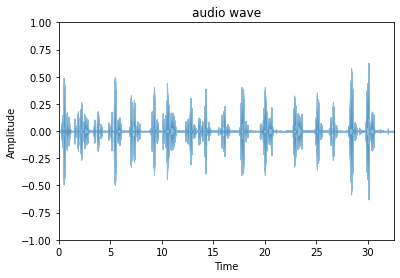

In [5]:
#%% Visualise the waveform
import matplotlib.pyplot as plt

librosa.display.waveplot(audio, alpha=0.5)
plt.title("audio wave")
plt.ylim((-1,1))
plt.ylabel("Amplitude")
plt.show()

In [6]:
#%% Calculate the Amplitude Envelop manually since the librosa doesn't contain this
frame_size = 1024
hop_length = 512        #Stride from framing

# Calculate the AE in an utterance
def amplitude_envelop(signal, framesize, hoplength):
    amplitude_envelop = []

    #Calculate the AE for each frame
    for i in range(0, len(signal),hoplength):       #To make i always start from the first sample in each frame
        current_frame_AE = max(signal[i:i+framesize])       #Take each frame of the signal into consideration
        amplitude_envelop.append(current_frame_AE)

    return np.array(amplitude_envelop)

AE_audio = amplitude_envelop(audio, framesize=frame_size, hoplength=hop_length)
print(len(AE_audio))

1401


In [7]:
# Calculate the fancy-AE
def fancy_amplitude_envelop(signal, framesize, hoplength):
    return np.array([max(signal[i:i+framesize]) for i in range(0,signal.size,hoplength)])

fancy_AE_audio = fancy_amplitude_envelop(audio, framesize=frame_size, hoplength=hop_length)
print(len(fancy_AE_audio))

1401


In [8]:
#Compare the samples in the AE and fancy-AE one by one
print((AE_audio==fancy_AE_audio).all())

True


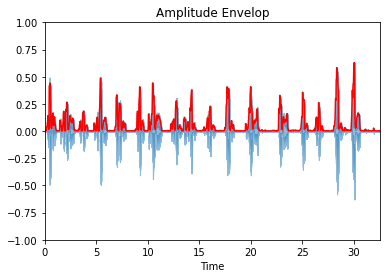

In [9]:
#%% Visalise the AE in the whole utterance
frames = range(0,AE_audio.size)
t = librosa.frames_to_time(frames,hop_length=hop_length)        #Translate the frames into time info

librosa.display.waveplot(audio, alpha=0.5)
plt.plot(t, AE_audio, color="r")
plt.ylim((-1,1))
plt.title("Amplitude Envelop")
plt.show()